<a href="https://colab.research.google.com/github/ceciliaberon/Data_Science_I/blob/main/ProyectoParteIIIBERON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Trabajo Practico N°1 del curso Data Science I

# Consignas:

1.   Generar preguntas o hipótesis de interés sobre el dataset elegido para el proyecto final.
2.   Crear gráficos que usen al menos tres variables y hacer un diagnóstico de lo que los mismos nos están diciendo.
3.   Vincular los gráficos y análisis numéricos hechos hasta el momento con las preguntas de interés.
4.   Identificar valores perdidos.

Para el siguiente trabajo, se plantea como hipótesis principal analizar los datos de la base de licitaciones del país chileno. Esta base de datos, disponible públicamente a través del siguiente enlace: [link text](https://chc-lic-files.mercadopublico.cl/sector/2024/Sem2/Otros.7z), contiene información relevante sobre los procesos de adquisición de bienes y servicios por parte de entidades públicas. El objetivo inicial es identificar y clasificar los productos y servicios que se consumen, así como los tiempos asociados a cada etapa del proceso de licitación, desde el ingreso de la solicitud hasta su aprobación final.

Mediante el análisis de esta información, se busca comprender en mayor profundidad el flujo de trabajo de los procesos de contratación pública, detectando posibles cuellos de botella, ineficiencias o áreas de mejora. Además, se pretende evaluar la metodología actual de trabajo para recomendar cambios o ajustes que optimicen los tiempos de respuesta y la eficiencia operativa. Un foco particular estará puesto en aquellos productos y/o servicios cuyos procesos presenten mayores demoras o irregularidades, ya que podrían requerir una re-evaluación de los procedimientos aplicados.

El estudio de los datos permitirá no solo generar propuestas de mejora para los procesos internos de licitación, sino también contribuir al desarrollo de estrategias más transparentes, eficientes y orientadas a resultados dentro del sistema de compras públicas. A largo plazo, este tipo de análisis podría impactar positivamente en la gestión de recursos estatales y en la calidad del servicio ofrecido a la ciudadanía.

In [1]:
#El archivo al ser pesado, se busco la forma de descargar el archivo .7z desde la URL
import requests

url = 'https://chc-oc-files.mercadopublico.cl/sector/2024/Sem2/Otros.7z'
response = requests.get(url)

with open('Otros.7z', 'wb') as f:
    f.write(response.content)

print("✅ Archivo descargado.")

# Luego como paso 2: Instalar 7zip para descomprimir archivos .7z
!apt-get install -y p7zip-full

# Paso 3: Extraer el archivo .7z
!7z x Otros.7z

# Paso 4: Ver qué archivo se extrajo (nombre del CSV)
!ls



✅ Archivo descargado.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-8).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 12196021 bytes (12 MiB)

Extracting archive: Otros.7z
--
Path = Otros.7z
Type = 7z
Physical Size = 12196021
Headers Size = 270
Method = LZMA:26
Solid = +
Blocks = 1

  0%      4% - 06OCCompraAgil.csv                           8% - 06OCCompraAgil.csv                          13% - 06OCCompraAgil.csv                          16

In [52]:
#Librerías básicas
import pandas as pd                        # Manipulación de DataFrames
import seaborn as sns                      # Visualización avanzada
import matplotlib.pyplot as plt            # Gráficos base
import matplotlib.ticker as mtick          # Formato de ejes en gráficos
import warnings                            # Manejo de advertencias
import unicodedata                         # Normalización de texto
import numpy as np                         # Cálculos numéricos

#Librería para cargar archivos desde Colab
from google.colab import files             # Subir/descargar archivos en Google Colab
#Preprocesamiento
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer   # Imputar valores faltantes (NaN)
#División de datos y pipelines
from sklearn.model_selection import train_test_split         # Dividir dataset en train/test
from sklearn.pipeline import Pipeline                        # Encadenar pasos de preprocesamiento y modelo
from sklearn.compose import ColumnTransformer                # Aplicar transformaciones por tipo de columna
#Modelos de clasificación y regresión
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#Métricas para evaluación de modelos
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,  # Clasificación
    mean_squared_error, r2_score                              # Regresión
)
from sklearn.model_selection import StratifiedKFold, cross_val_predict

In [4]:
df = pd.read_csv('06OCCompraAgil.csv', sep=None, engine='python', encoding='latin1', on_bad_lines='skip')
df.head()


,codigoOC,FechaEnvioOC,NombreOC,DescripcionOC,EstadoOC,ProcedenciaOC,MonedaOC,MontoNetoOC,DescuentosOC,CargosOC,...,CantidadSolicitada,ProveedorCotizacion,RUTProveedorCotizacion,DetalleCotizacion,PrecioUnitarioCotizacion,PrecioTotalItemCotizacion,MontoNetoCotizacion,MontoDespachoCotizacion,MontoTotalCotizacion,ProveedorSeleccionado
0,1300811-6-AG24,05-07-2024 0:00:00,Materiales electrónica,La CORPQUIN realiza proceso de Compra Ágil par...,Recepcion Conforme,Compra Agil,CLP,1575960,0,0,...,3.0,COMERCIALIZADORA ANIGRUP SPA,77.540.825-1,"ESTIMADOS, BUENOS DIAS. ADJUNTO COTIZACION DET...",4090,12270,1638030,0,1949255,SI
1,1300811-7-AG24,05-07-2024 0:00:00,Materiales Telecomunicaciones,La CORPQUIN realiza proceso de Compra Ágil par...,Recepcion Conforme,Compra Agil,CLP,1580450,0,0,...,2.0,COMERCIAL IMCOTEC LIMITADA,78.954.580-4,Adjunto propuesta por los productos solicitado...,13700,27400,1643450,0,1955705,SI
2,1300811-7-AG24,05-07-2024 0:00:00,Materiales Telecomunicaciones,La CORPQUIN realiza proceso de Compra Ágil par...,Recepcion Conforme,Compra Agil,CLP,1580450,0,0,...,20.0,COMERCIAL IMCOTEC LIMITADA,78.954.580-4,Adjunto propuesta por los productos solicitado...,360,7200,1643450,0,1955705,SI
3,1300811-7-AG24,05-07-2024 0:00:00,Materiales Telecomunicaciones,La CORPQUIN realiza proceso de Compra Ágil par...,Recepcion Conforme,Compra Agil,CLP,1580450,0,0,...,6.0,COMERCIAL IMCOTEC LIMITADA,78.954.580-4,Adjunto propuesta por los productos solicitado...,12000,72000,1643450,0,1955705,SI
4,1300811-7-AG24,05-07-2024 0:00:00,Materiales Telecomunicaciones,La CORPQUIN realiza proceso de Compra Ágil par...,Recepcion Conforme,Compra Agil,CLP,1580450,0,0,...,5.0,COMERCIAL IMCOTEC LIMITADA,78.954.580-4,Adjunto propuesta por los productos solicitado...,8500,42500,1643450,0,1955705,SI


In [5]:
df.dtypes

,0
codigoOC,object
FechaEnvioOC,object
NombreOC,object
DescripcionOC,object
EstadoOC,object
...,...
PrecioTotalItemCotizacion,object
MontoNetoCotizacion,object
MontoDespachoCotizacion,int64
MontoTotalCotizacion,object


In [6]:
#Se procede a ver los null y la cantidad de estos
df.isnull()

,codigoOC,FechaEnvioOC,NombreOC,DescripcionOC,EstadoOC,ProcedenciaOC,MonedaOC,MontoNetoOC,DescuentosOC,CargosOC,...,CantidadSolicitada,ProveedorCotizacion,RUTProveedorCotizacion,DetalleCotizacion,PrecioUnitarioCotizacion,PrecioTotalItemCotizacion,MontoNetoCotizacion,MontoDespachoCotizacion,MontoTotalCotizacion,ProveedorSeleccionado
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264403,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
264404,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
264405,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
264406,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
#Ver el campo descripciones
conteo = df.groupby('DescripcionOC').count()

print(conteo)

                                                    codigoOC  FechaEnvioOC  \
DescripcionOC                                                                
  MSA/PROGRAMA 4 A 7 ESCUELA SARA CORTES- INSUM...       198           198   
  candados  las  hortensias                                1             1   
 1. Servicios requeridos: Se debe considerar pa...         1             1   
 1126922-693-COT24 Orden de Compra codigo: 1126...         1             1   
 1126922-891-COT24 Orden de Compra codigo: 1126...         1             1   
...                                                      ...           ...   
F.T.N.(MIM) tiene un modelo de prevención de d...       710           710   
F.T.N.(MIM) tiene un modelo de prevención de d...         1             1   
MANTENCIÓN Y REPARACIÓN DE SERVICIOS HIGIENICO...         1             1   
\tEN LA FACTURA A EMITIR NO DEBE INGRESAR MÁS ...         8             8   
\tEN LA FACTURA A EMITIR NO DEBE INGRESAR MÁS ...         2    

In [10]:
print(df.columns.tolist())

['codigoOC', 'FechaEnvioOC', 'NombreOC', 'DescripcionOC', 'EstadoOC', 'ProcedenciaOC', 'MonedaOC', 'MontoNetoOC', 'DescuentosOC', 'CargosOC', 'ImpuestosOC', 'MontoTotalOC', 'ImpuestosOC_CLP', 'MontoNetoOC_CLP', 'MetodoPago', 'TipoDespacho', 'Financiamiento', 'UnidadCompra', 'UnidadCompraRUT', 'RegionUnidadCompra', 'entCode', 'Institucion', 'Sector', 'Proveedor', 'ProveedorRUT', 'ActividadProveedor', 'TamanoProveedor', 'RegionProveedor', 'RubroN1', 'RubroN2', 'RubroN3', 'CodigoProductoONU', 'ONUProducto', 'NombreItem', 'DescripcionItem', 'CantidadItem', 'UnidadMedida', 'MonedaItem', 'MontoNetoItem', 'DescuentoItem', 'CargosItem', 'ImpuestoEspecificoItem', 'MontoTotalItem', 'MontoNetoItemCLP', 'CodigoCotizacion', 'NombreCotizacion', 'DescripcionCotizacion', 'FechaPublicacionCotizacion', 'FechaCierreCotizacion', 'MontoDisponible', 'DescripcionProducto', 'CodigoProductoCotizadoONU', 'ProductoCotizado', 'CantidadSolicitada', 'ProveedorCotizacion', 'RUTProveedorCotizacion', 'DetalleCotizacio

In [11]:
#El campo de tiempo, no estaba como data sino como objeto por lo que se convertir a formato datetime
df['FechaPublicacionCotizacion'] = pd.to_datetime(df['FechaPublicacionCotizacion'], errors='coerce')
df['FechaCierreCotizacion'] = pd.to_datetime(df['FechaCierreCotizacion'], errors='coerce')
df['FechaEnvioOC'] = pd.to_datetime(df['FechaEnvioOC'], errors='coerce')

# Crear copia del DataFrame con nombre df1
df1 = df.copy()

# Verificamos los tipos de datos para confirmar
print(df1[['FechaPublicacionCotizacion', 'FechaCierreCotizacion','FechaEnvioOC']].dtypes)


<ipython-input-11-f74c3683d991>:3: UserWarning: Parsing dates in %d-%m-%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['FechaCierreCotizacion'] = pd.to_datetime(df['FechaCierreCotizacion'], errors='coerce')


FechaPublicacionCotizacion    datetime64[ns]
FechaCierreCotizacion         datetime64[ns]
FechaEnvioOC                  datetime64[ns]
dtype: object


In [12]:
#Renombramos los campos
df1 = df1.rename(columns={
    'FechaPublicacionCotizacion': 'Fechapub',
    'FechaCierreCotizacion': 'Fechacierre',
     'FechaEnvioOC': 'FechaEnvio'
})

# Verificamos que se hayan renombrado correctamente
print(df1[['FechaEnvio','Fechapub', 'Fechacierre']].head())


  FechaEnvio   Fechapub Fechacierre
0 2024-05-07 2024-11-06  2024-06-17
1 2024-05-07        NaT  2024-06-18
2 2024-05-07        NaT  2024-06-18
3 2024-05-07        NaT  2024-06-18
4 2024-05-07        NaT  2024-06-18


#Analisis de los datos temporales

Dado que el conjunto de datos contiene tres instancias temporales —fecha de envío, fecha de inicio de cotización y fecha de cierre de cotización— se procedió a analizar todas las combinaciones posibles entre ellas. A partir de este análisis, se definieron varias categorías:

Los registros que contienen las tres fechas se consideran correctamente cargados.

Aquellos que poseen fechas de envío e inicio de cotización, pero no de cierre, se interpretan como procesos en curso.

Los casos con datos incompletos o inconsistentes se marcan como “a observar”.

Finalmente, los registros que no cuentan con ninguna de las tres fechas se catalogan como obsoletos.

In [13]:
#Función para clasificar el estado de cada fila en base a la presencia o ausencia de fechas clave
def clasificar_estado_fechas(row):
    # Verifica si cada fecha está presente
    envio = pd.notnull(row['FechaEnvio'])
    pub = pd.notnull(row['Fechapub'])
    cierre = pd.notnull(row['Fechacierre'])

    if envio and not pub and cierre:
        return 'observar1'         # Tiene envío y cierre, pero no publicación
    elif envio and pub and cierre:
        return 'dato correcto'     # Tiene todas las fechas completas
    elif not envio and pub and cierre:
        return 'observar2'         # Le falta la fecha de envío
    elif envio and pub and not cierre:
        return 'en proceso'        # Falta el cierre (posible proceso abierto)
    elif not envio and not pub and cierre:
        return 'observar3'         # Tiene solo el cierre
    elif not envio and not pub and not cierre:
        return 'obsoleto'          # No tiene ninguna de las fechas
    else:
        return 'otro'              # Cualquier otra combinación no contemplada

#Aplicar la función a cada fila del DataFrame para crear la columna 'estado_fecha'
df1['estado_fecha'] = df1.apply(clasificar_estado_fechas, axis=1)

#Mostrar cuántos registros hay de cada tipo de estado generado
print("\n📊 Distribución de estado_fecha:")
print(df1['estado_fecha'].value_counts())



📊 Distribución de estado_fecha:
estado_fecha
observar3        108986
observar2         54495
dato correcto     51231
observar1         49696
Name: count, dtype: int64


A partir del análisis preliminar de los datos, se identifican numerosos casos que presentan fecha de cierre de cotización, pero carecen de información sobre la fecha de envío y de publicación de la cotización. También se observa un segundo grupo relevante compuesto por registros que incluyen fechas de inicio y cierre de cotización, pero no registran la fecha de envío.

Con estos resultados se analizara "estado_fecha" con "EstadoOC" y "Estados" para determinar si existe algun patron para tener en cuenta

In [14]:
# Verificar los valores únicos de estado_fecha
print("📋 Categorías únicas en 'estado_fecha':")
print(df1['estado_fecha'].unique())

# Codificar estado_fecha como clases numéricas
le_estado_multiclase = LabelEncoder()
df1['estado_multiclase'] = le_estado_multiclase.fit_transform(df1['estado_fecha'])

# Mostrar cómo se codificaron las clases
print("\n🔢 Codificación de clases multiclase:")
for clase, cod in zip(le_estado_multiclase.classes_, le_estado_multiclase.transform(le_estado_multiclase.classes_)):
    print(f"'{clase}' → {cod}")

# Ver distribución de clases codificadas
print("\n📊 Distribución de registros por clase:")
print(df1['estado_multiclase'].value_counts())

📋 Categorías únicas en 'estado_fecha':
['dato correcto' 'observar1' 'observar2' 'observar3']

🔢 Codificación de clases multiclase:
'dato correcto' → 0
'observar1' → 1
'observar2' → 2
'observar3' → 3

📊 Distribución de registros por clase:
estado_multiclase
3    108986
2     54495
0     51231
1     49696
Name: count, dtype: int64


<ipython-input-15-2f90a788b7f3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=clases, y=conteo_clases.values, palette='Set2')


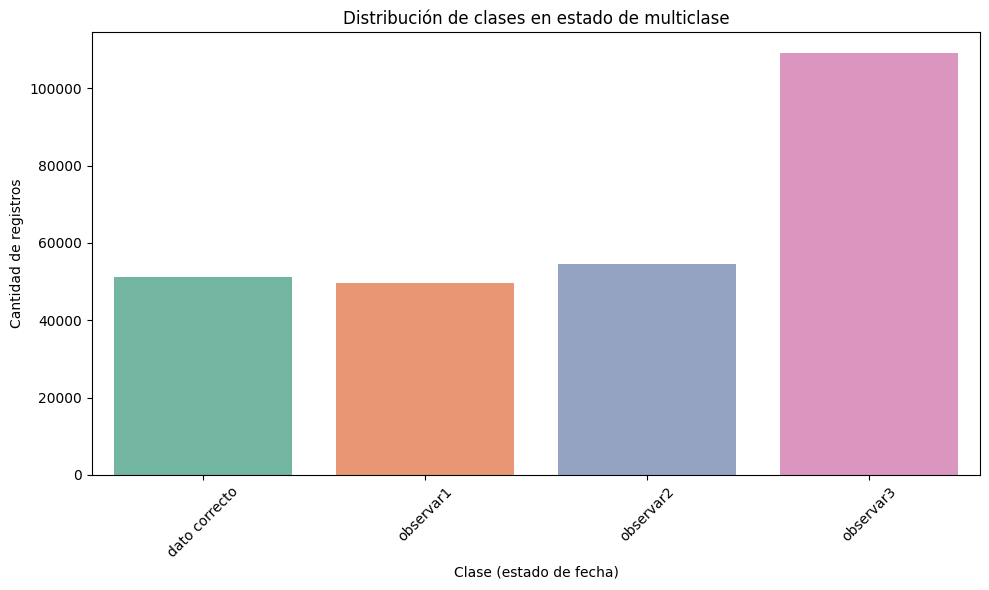

In [15]:
# Verificar distribución de clases
conteo_clases = df1['estado_multiclase'].value_counts().sort_index()

# Recuperar los nombres originales de las clases
clases = list(le_estado_multiclase.inverse_transform(conteo_clases.index))
# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=clases, y=conteo_clases.values, palette='Set2')

plt.title("Distribución de clases en estado de multiclase")
plt.xlabel("Clase (estado de fecha)")
plt.ylabel("Cantidad de registros")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

A partir del análisis de los datos, se observa que los registros clasificados bajo el estado "observar3" corresponden a aquellos que no presentan información ni sobre la fecha de envío ni sobre el inicio del proceso de cotización. Estos casos han sido catalogados como incompletos, y representan una cantidad significativa de registros a considerar en el análisis.


📊 Cruce entre estado_fecha y EstadoOC:
EstadoOC       Aceptada  En Proceso  Enviada a Proveedor  Recepcion Conforme  \
estado_fecha                                                                   
dato correcto     24633           3                   66               26511   
observar1         16743         361                   70               32468   
observar2         26599          32                  125               27720   
observar3         52273         234                 1030               55427   

EstadoOC       Solicitud de Cancelacion  
estado_fecha                             
dato correcto                        18  
observar1                            54  
observar2                            19  
observar3                            22  


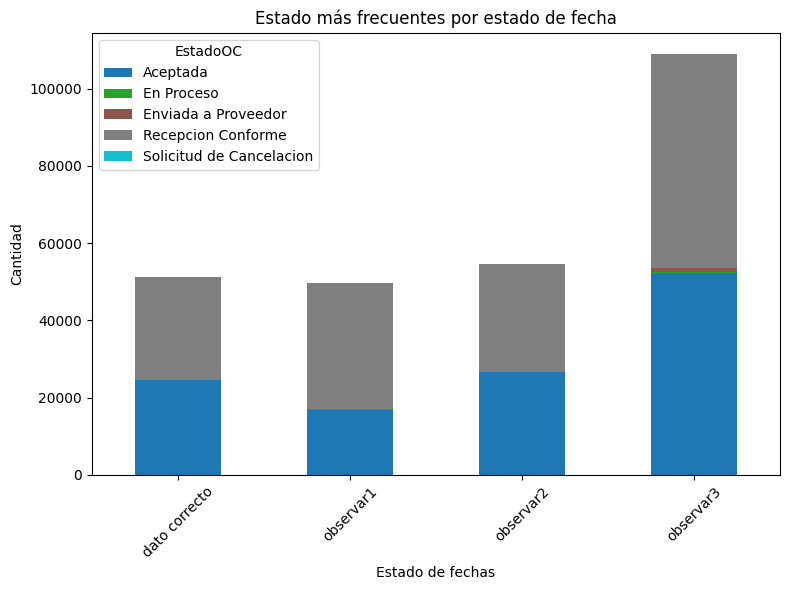

In [16]:
# Cruzar estado_fecha con EstadoOC
cruce_oc = pd.crosstab(df1['estado_fecha'], df1['EstadoOC'])

print("\n📊 Cruce entre estado_fecha y EstadoOC:")
print(cruce_oc)

# Visualizar los más frecuentes (solo top 5 columnas para claridad)
cruce_oc[cruce_oc.columns[:5]].plot(kind='bar', stacked=True, figsize=(8,6), colormap='tab10')
plt.title("Estado más frecuentes por estado de fecha")
plt.ylabel("Cantidad")
plt.xlabel("Estado de fechas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Al comparar los datos de fechas con el campo “EstadoOC”, se observa una tendencia similar: los registros clasificados como “observar3” constituyen la mayoría. Sin embargo, resulta llamativo que muchos de estos casos presentan estados como “Aceptado” o “Recepción conforme”, lo cual plantea una inconsistencia significativa. Esta situación impide establecer una trazabilidad clara del flujo logístico, ya que no se cuenta con información temporal completa que respalde dichos estados.

#Analisis de información de provedores

Como parte del proceso de exploración de datos, se analiza la columna correspondiente a las actividades de los proveedores. Se observa que esta información no se encuentra normalizada, lo que dificulta una interpretación precisa. Por esta razón, antes de continuar con el análisis, se procederá a normalizar dichas actividades. Una vez completada esta etapa, se evaluará la cantidad de actividades distintas registradas, así como su distribución en relación con los estados temporales disponibles en el conjunto de datos.


In [17]:
def normalizar_texto(texto):
    # Verificar si el valor no es NaN
    if isinstance(texto, str):
        texto = texto.lower()  # Convertir a minúsculas
        texto = ''.join(c for c in texto if unicodedata.category(c) != 'Mn')  # Eliminar tildes
        texto = texto.replace('/', ' ')  # Reemplazar las barras (si las hay)
        texto = texto.strip()  # Eliminar espacios al inicio y final
    return texto

# Aplicar la normalización solo a los valores de tipo texto
df1['ActividadProveedor'] = df1['ActividadProveedor'].apply(normalizar_texto)

# Verificar los primeros resultados después de la normalización
df1['ActividadProveedor'].head()


,ActividadProveedor
0,NaN
1,venta al por mayor de otros productos n.c.p.| ...
2,venta al por mayor de otros productos n.c.p.| ...
3,venta al por mayor de otros productos n.c.p.| ...
4,venta al por mayor de otros productos n.c.p.| ...


Se generará categorias a grandes rasgos que agruparan las actividades en

*   Servicios
*   Ventas
*   Transporte
*   Fabrica
*   Otros

In [19]:
# Definir las palabras clave para cada categoría
categorias = {
      'servicios' : [
        'hoteles', 'mantenimiento', 'asesoría', 'eventos', 'gastronomía', 'marketing',
        'servicios', 'consultoría', 'salud', 'educación', 'limpieza', 'seguridad', 'recreación',
        'refrigeración', 'turismo', 'prestación', 'reparación', 'sistemas', 'arquitecto', 'ingeniería',
        'asesores', 'consultora', 'fábrica', 'importadora', 'hotel', 'entretenciones', 'agencia',
        'agroturismo', 'banquetería', 'banquetes', 'banquete', 'cultura', 'artística', 'diseño',
        'construcción', 'productora', 'proyectos', 'proyecto', 'obra', 'instalación', 'consultoría',
        'MANTENCION MAQUINARIA', 'SERVICIOS', 'N.C.P', 'Proyectos e instalaciones', 'Abogado', 'Abogados',
        'Acondicionamiento', 'ACT ESPECIALIZADAS', 'ACTIVIDAD DE SERVICIO', 'ACTIVIDADES ARTISTICAS',
        'Actividades', 'Administración', 'Agua purificada', 'Alfarero', 'Alquiler', 'Arquitecto', 'Arriendo',
        'Ascensores', 'Aseo de oficinas', 'Aseo', 'Aserrado', 'Asistencia', 'Autocuidado', 'Banqueria',
        'Banqueteria', 'Cafetería', 'Capacitación', 'capacitaciones', 'Cambio de aceite', 'Cambio de aceites',
        'centro de', 'centro', 'certificación', 'certificaciones', 'ciencias sociales', 'cines', 'clases outdoor',
        'climatización', 'coemrcializadora', 'coercializacion', 'cofecciones', 'coffe break', 'computación',
        'comunicaciones', 'confección', 'confiteria', 'constructora', 'contratista', 'control', 'corporación',
        'corretaje', 'corte', 'cortina', 'cria', 'criadero', 'cuenta corriente', 'cultivo', 'curtiembre', 'deporte',
        'desratización', 'destrucción', 'diseño', 'efectos', 'elaboración', 'Electricidad', 'electrónico',
        'emisiones de radio', 'empresa', 'empresas', 'entretenciones', 'entretenimiento', 'equipamiento', 'Equipos',
        'Estampados', 'Estampado', 'estudios', 'evacuación', 'Explotación', 'extintor', 'fuente de soda', 'fumigación',
        'fumigaciones', 'gimnaio', 'grabado y publicidad', 'hospedajes', 'imprenta', 'impresión', 'impresores',
        'informática', 'ingeniería', 'inspecciones', 'instalación', 'instalaciones', 'instalador', 'instituto',
        'institutos', 'la prestación', 'lavanderia', 'letreros', 'limpieza', 'mantención', 'mantenimientos', 'medio ambiente',
        'monitora folclor', 'moteles', 'musico', 'nutricionista', 'obras', 'oficina', 'operación', 'operador',
        'organización', 'preparaciones', 'preparación', 'prestación', 'prestaciones', 'procesamiento', 'programación',
        'proyectos', 'radiodifusión', 'recreacional', 'refrigeración', 'regalos', 'renta', 'rep.', 'reparación',
        'representación', 'representaciones', 'topografía', 'tratamientos', 'universidad', 'universidades'
    ],
    'Ventas': [
        'alfombras', 'alimentación', 'alimentos', 'almacen', 'almacenes', 'aluminios', 'amasanderia',
        'amplificación', 'apicultura', 'arrendamiento', 'art.', 'artesania', 'articulos', 'bazar', 'boleta',
        'bordado', 'com de libros', 'com', 'comer.', 'comerc.', 'comercial', 'comercial.', 'comercializa',
        'comercialización', 'comercializadora', 'comerciliazora', 'comercializadora', 'comercilizadora',
        'comercio', 'comercio,venta', 'comercializacion', 'comercializadora', 'comerzilizacion', 'comisionista',
        'compra -', 'compra', 'compraventa', 'comrecializadora', 'edición', 'editorial', 'establecimientos',
        'estación de servicio', 'estructuras', 'farmacia', 'ferreteria', 'florería', 'forja', 'grafica',
        'grandes establecimientos', 'grandes tiendas', 'instrumentos', 'insumos', 'inversiones', 'laboratorio',
        'laboratorios', 'librería', 'libros', 'lubricentro', 'manufactura', 'materiales', 'material', 'mayorista',
        'medicina. venta', 'mercado', 'merchandising', 'mini market', 'minimarket', 'minimarquet', 'mpraventa',
        'mueblería', 'muebles', 'óptica', 'panaderia', 'papelera', 'parque', 'pasteleria', 'pesca artesanal',
        'planes de seguros', 'prdo.', 'productos', 'proveedores', 'proveedor', 'publicidad', 'repuestos', 'seguros',
        'suministros', 'taller automotriz', 'taller', 'talleres', 'tienda', 'tintas', 'restaurante', 'restautant',
        'restaurantes', 'restoran', 'ropa', 'sala cuna', 'sala de ventas', 'televisión', 'venta', 'ventas', 'vidriería',
        'viveros', 'vta.', 'vta', 'vta.art'
    ],
    'Transporte': [
        'transpote', 'transporte', 'distribución', 'distribuidora', 'ditrib', 'imp.', 'imp.,', 'import',
        'import.', 'importación', 'importaciones', 'logística', 'trans\'porte', 'transporte', 'transportes',
        'transportista', 'transportistas'
    ],
    'Fábrica': [
        'fabricación', 'industria', 'textil', 'mecanizado industrial', 'producción', 'tecnología', 'telecomunicaciones'
    ],
    'Otros': [
        'otras', 'otros', 'vallas', 'varios'
    ]
}

# Función para clasificar las actividades usando la primera palabra
def clasificar_actividad(actividad):
    # Convertir a minúsculas para evitar problemas de may/min
    actividad = str(actividad).lower()

    # Dividir la actividad en palabras
    palabras = actividad.split()

    # Verificar en qué categoría entra la primera palabra de la actividad
    for categoria, palabras_clave in categorias.items():
        if any(palabra in palabras[0] for palabra in palabras_clave):
            return categoria

    # Si no encuentra coincidencias, se asigna a 'Otros'
    return 'Otros'

# Aplicar la función al DataFrame
df1['CategoriaActividad'] = df1['ActividadProveedor'].apply(clasificar_actividad)

# Verificar el resultado
print(df1[['ActividadProveedor', 'CategoriaActividad']].head())

# Contar cuántos registros hay por categoría
print(df1['CategoriaActividad'].value_counts())


                                  ActividadProveedor CategoriaActividad
0                                                NaN              Otros
1  venta al por mayor de otros productos n.c.p.| ...             Ventas
2  venta al por mayor de otros productos n.c.p.| ...             Ventas
3  venta al por mayor de otros productos n.c.p.| ...             Ventas
4  venta al por mayor de otros productos n.c.p.| ...             Ventas
CategoriaActividad
Otros         130131
Ventas        107702
Transporte     14435
servicios      11621
Fábrica          519
Name: count, dtype: int64


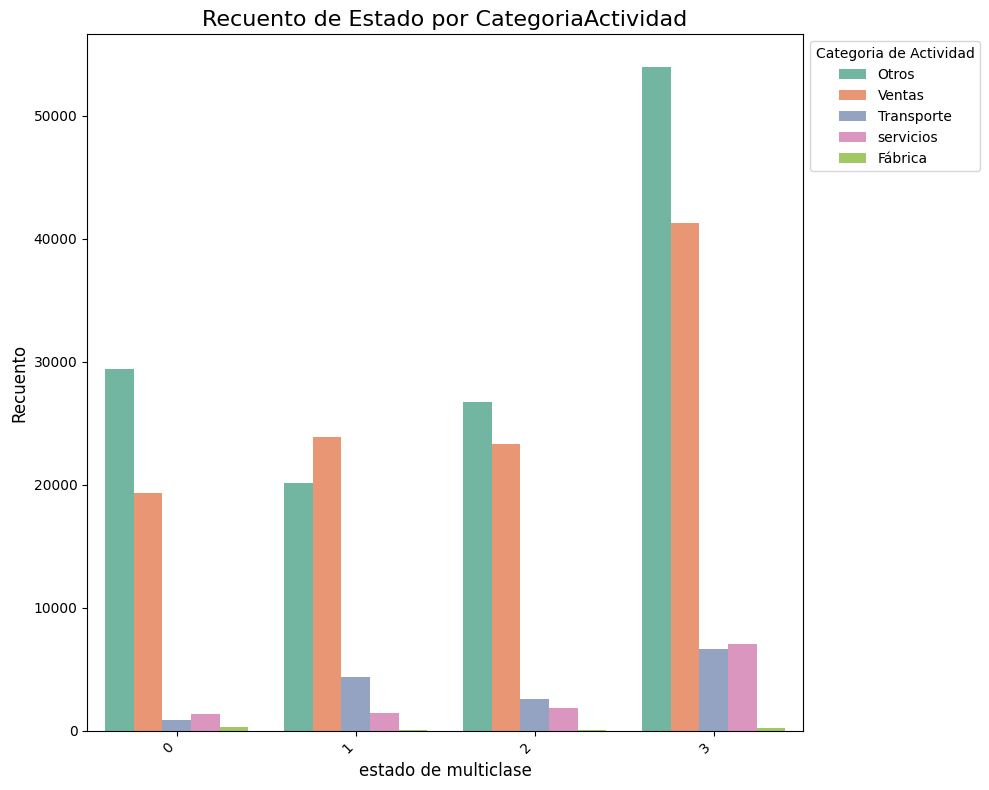

In [20]:
# Crear un gráfico de barras para ver la distribución de Estado y CategoriaActividad
plt.figure(figsize=(10, 8))
sns.countplot(data=df1, x="estado_multiclase", hue="CategoriaActividad", palette="Set2")

# Personalizar el gráfico
plt.title("Recuento de Estado por CategoriaActividad", fontsize=16)
plt.xlabel("estado de multiclase", fontsize=12)
plt.ylabel("Recuento", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje
plt.legend(title="Categoria de Actividad", bbox_to_anchor=(1, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Posterior a la normalizacion de actividad de provedores, se busca analizar el flujo de dinero en cada una de estas. Por lo cual se verificara el tipo de campo y de no ser numerico se procedera a modificarlo para poder seguir el analisis.

In [21]:
df1["MontoTotalCotizacion"] = pd.to_numeric(df1["MontoTotalCotizacion"], errors='coerce')  # Convierte la columna a numérica
print(df1)

                 codigoOC FechaEnvio  \
0          1300811-6-AG24 2024-05-07   
1          1300811-7-AG24 2024-05-07   
2          1300811-7-AG24 2024-05-07   
3          1300811-7-AG24 2024-05-07   
4          1300811-7-AG24 2024-05-07   
...                   ...        ...   
264403   1237328-880-AG24        NaT   
264404   1237328-881-AG24        NaT   
264405  1126922-2891-AG24        NaT   
264406   1251183-335-AG24        NaT   
264407   1251183-335-AG24        NaT   

                                                 NombreOC  \
0                                  Materiales electrónica   
1                           Materiales Telecomunicaciones   
2                           Materiales Telecomunicaciones   
3                           Materiales Telecomunicaciones   
4                           Materiales Telecomunicaciones   
...                                                   ...   
264403  Orden de Compra generada por invitación a comp...   
264404  Orden de Compra generad

In [22]:
# Contar valores nulos en la columna "MontoTotalOC"
null_count = df1['MontoTotalCotizacion'].isnull().sum()

# Imprimir el resultado
print(f"Cantidad de valores nulos en 'MontoTotalCotizacion': {null_count}")

# Convertimos a float y manejamos nulos con errors='coerce' (convierte errores a NaN)
df1['MontoTotalCotizacion'] = pd.to_numeric(df1['MontoTotalCotizacion'], errors='coerce')

# Corregir strings con coma y convertir a float
df1.loc[:, 'MontoNetoOC'] = pd.to_numeric(df1['MontoNetoOC'].astype(str).str.replace(',', '.'), errors='coerce')
df1.loc[:, 'MontoTotalCotizacion'] = pd.to_numeric(df1['MontoTotalCotizacion'].astype(str).str.replace(',', '.'), errors='coerce')


Cantidad de valores nulos en 'MontoTotalCotizacion': 4


Se busca analizar la distribución de los proveedores en función de los estados de sus transacciones, específicamente evaluando la relación entre la categoría de actividad (CategoriaActividad) y el estado de orden de compra (EstadoOC). Este cruce permitirá identificar posibles patrones de comportamiento entre tipos de proveedores y el estado final de sus procesos de compra.

In [25]:
# Tabla cruzada entre categoría y estado de orden
cruce_categoria_estado = pd.crosstab(df1['CategoriaActividad'], df1['EstadoOC'])

# Agregar columna con el total de cada categoría
cruce_categoria_estado['Total'] = cruce_categoria_estado.sum(axis=1)

# Ordenar por la columna Total y seleccionar las 10 categorías con más registros
cruce_categoria_estado_top10 = cruce_categoria_estado.sort_values(by='Total', ascending=False).head(10)

# Eliminar la columna Total antes de graficar o imprimir (si no querés mostrarla)
cruce_categoria_estado_top10 = cruce_categoria_estado_top10.drop(columns='Total')

# Mostrar resultado
print("Conteo cruzado entre CategoriaActividad y EstadoOC (Top 10 categorías):")
print(cruce_categoria_estado_top10)

Conteo cruzado entre CategoriaActividad y EstadoOC (Top 10 categorías):
EstadoOC            Aceptada  En Proceso  Enviada a Proveedor  \
CategoriaActividad                                              
Otros                  57819          26                 1055   
Ventas                 53081         601                  210   
Transporte              4794           0                    0   
servicios               4204           3                   26   
Fábrica                  350           0                    0   

EstadoOC            Recepcion Conforme  Solicitud de Cancelacion  
CategoriaActividad                                                
Otros                            71143                        88  
Ventas                           53789                        21  
Transporte                        9641                         0  
servicios                         7384                         4  
Fábrica                            169                         0  


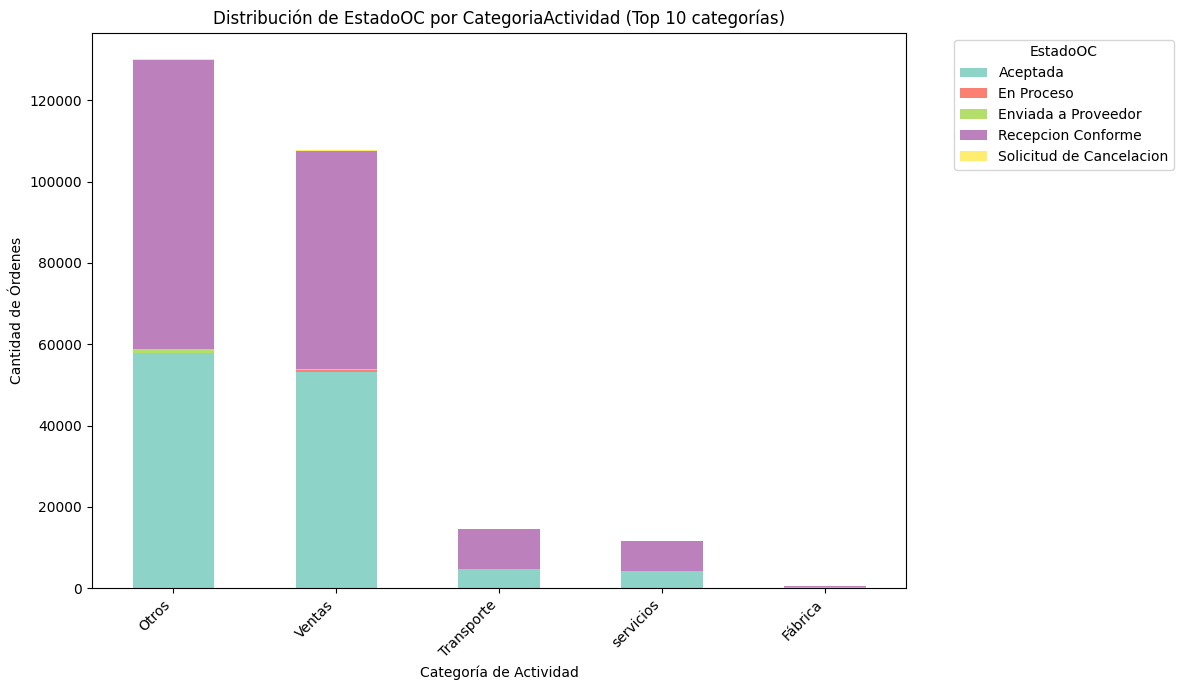

In [24]:
# Graficar
cruce_categoria_estado_top10.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7),
    colormap='Set3'
)

plt.title("Distribución de EstadoOC por CategoriaActividad (Top 10 categorías)")
plt.xlabel("Categoría de Actividad")
plt.ylabel("Cantidad de Órdenes")
plt.xticks(rotation=45, ha='right')
plt.legend(title="EstadoOC", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Se busca poder observar el flujo de movimiento de cada categoria, a lo largo del periodo y los montos totales.
Para que sea más legible el grafico los datos de fechas seran agrupados por mes.

In [27]:
# Crear nuevas columnas con el número de mes
df1['mes_envio'] = df1['FechaEnvio'].dt.month
df1['mes_cotin'] = df1['Fechapub'].dt.month
df1['mes_cotfin'] = df1['Fechacierre'].dt.month

# Filtrar solo las columnas seleccionadas y guardar como df2
df2 = df1

# Verificamos que se creó correctamente
print("df2 columnas:")
print(df2.columns)
print(f"Total de registros: {len(df2)}")


df2 columnas:
Index(['codigoOC', 'FechaEnvio', 'NombreOC', 'DescripcionOC', 'EstadoOC',
       'ProcedenciaOC', 'MonedaOC', 'MontoNetoOC', 'DescuentosOC', 'CargosOC',
       'ImpuestosOC', 'MontoTotalOC', 'ImpuestosOC_CLP', 'MontoNetoOC_CLP',
       'MetodoPago', 'TipoDespacho', 'Financiamiento', 'UnidadCompra',
       'UnidadCompraRUT', 'RegionUnidadCompra', 'entCode', 'Institucion',
       'Sector', 'Proveedor', 'ProveedorRUT', 'ActividadProveedor',
       'TamanoProveedor', 'RegionProveedor', 'RubroN1', 'RubroN2', 'RubroN3',
       'CodigoProductoONU', 'ONUProducto', 'NombreItem', 'DescripcionItem',
       'CantidadItem', 'UnidadMedida', 'MonedaItem', 'MontoNetoItem',
       'DescuentoItem', 'CargosItem', 'ImpuestoEspecificoItem',
       'MontoTotalItem', 'MontoNetoItemCLP', 'CodigoCotizacion',
       'NombreCotizacion', 'DescripcionCotizacion', 'Fechapub', 'Fechacierre',
       'MontoDisponible', 'DescripcionProducto', 'CodigoProductoCotizadoONU',
       'ProductoCotizado', 'Cantid

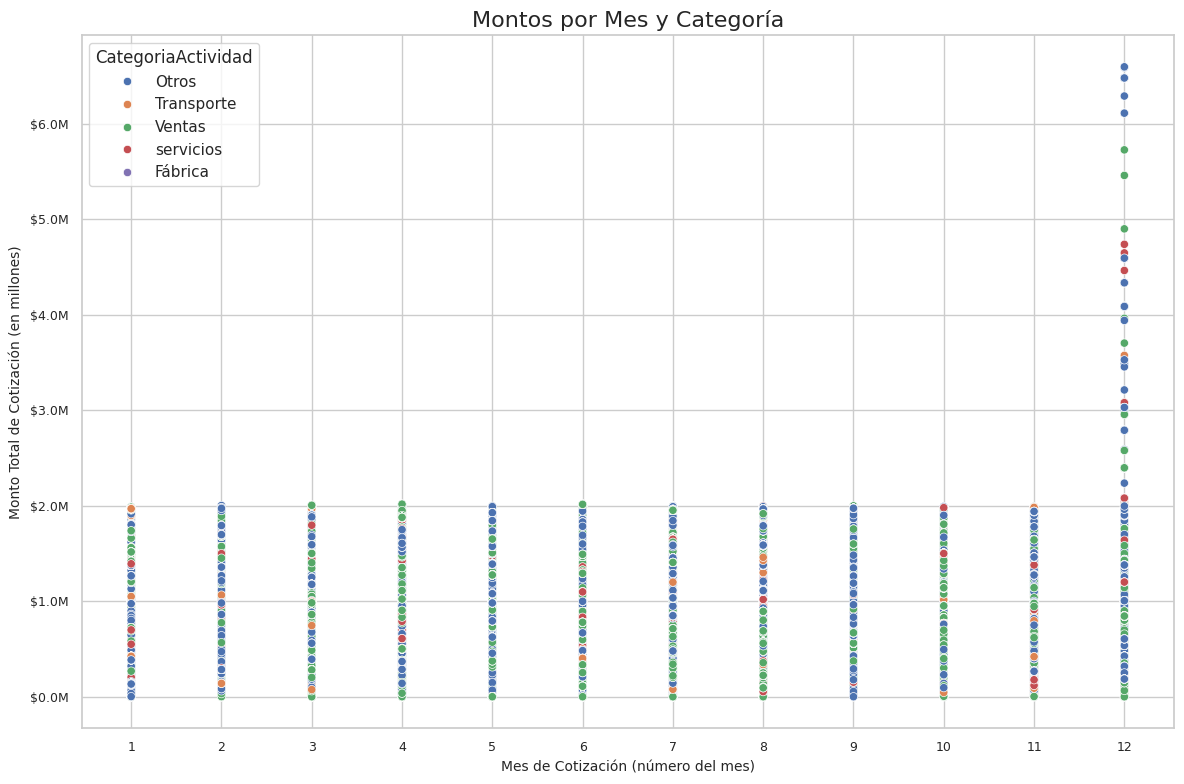

In [28]:
# Filtrar registros con valores no nulos en mes_cotin y MontoTotalCotizacion
df_plot = df2[df2['mes_cotin'].notna() & df2['MontoTotalCotizacion'].notna()].copy()

# Estilo del gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Crear el scatterplot
sns.scatterplot(
    data=df_plot,
    x="mes_cotin",
    y="MontoTotalCotizacion",
    hue="CategoriaActividad"
)

# Ajustar formato del eje Y a millones
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x/1_000_000:.1f}M'))

# Ejes y título
plt.xlabel("Mes de Cotización (número del mes)", fontsize=10)
plt.ylabel("Monto Total de Cotización (en millones)", fontsize=10)
plt.title("Montos por Mes y Categoría", fontsize=16)

# Eje X legible
plt.xticks(rotation=0, fontsize=9)
plt.yticks(fontsize=9)
ax.set_xticks(sorted(df_plot['mes_cotin'].unique()))

plt.tight_layout()
plt.show()

Como se puede observar existe una relación regular en los meses y la recaudación, pero en diciembre fue el mes de mayor cantidad de movimientos y mayores de montos.

In [24]:
# Guardar el resultado en un archivo CSV
df2.to_csv('actividad_proveedor.csv', sep=';', index=False, encoding='utf-8')

#Exploración de registros con fechas incompletas

Para avanzar con el análisis del caso de estudio, se realizará inicialmente una exploración de los registros que no presentan información completa en las columnas de fecha. El objetivo es identificar si existe algún patrón o criterio subyacente que aún no se ha considerado. Dado que estos casos constituyen la mayoría del conjunto de datos, su análisis resulta crucial. Esta etapa permitirá evaluar si estos registros reflejan posibles cuellos de botella, ineficiencias en la carga de información o áreas susceptibles de mejora, en línea con el objetivo general del trabajo.

In [30]:
# Filtrar casos incompletos
df_incompletos = df2[df2['estado_fecha'] == 'observar3'].copy()

# Filtrar por EstadoOC específico
df_cancelados = df_incompletos[df_incompletos['EstadoOC'] == 'Aceptada']

# Seleccionar columnas clave
df_resultado = df_cancelados[['EstadoOC', 'Fechapub', 'Fechacierre']]

# Mostrar los primeros registros
print("Casos INCOMPLETOS con EstadoOC = 'Aceptada':")
print(df_resultado.head(200))


Casos INCOMPLETOS con EstadoOC = 'Aceptada':
      EstadoOC Fechapub Fechacierre
569   Aceptada      NaT  2024-06-26
570   Aceptada      NaT  2024-06-26
571   Aceptada      NaT  2024-06-26
1017  Aceptada      NaT  2024-07-01
1283  Aceptada      NaT  2024-06-27
...        ...      ...         ...
3064  Aceptada      NaT  2024-06-14
3065  Aceptada      NaT  2024-06-14
3066  Aceptada      NaT  2024-06-14
3067  Aceptada      NaT  2024-06-14
3068  Aceptada      NaT  2024-06-14

[200 rows x 3 columns]


Con el objetivo de determinar la duración de los procesos de cotización, se calculará la cantidad de días transcurridos entre la fecha de inicio y la fecha de cierre de cada cotización. Esta métrica permitirá analizar los periodos promedio de respuesta, identificar posibles demoras y clasificar los procesos según su duración.

In [31]:
# Crear columna de duración
df2['duracion_cotizacion'] = (df2['Fechacierre'] - df2['FechaEnvio']).dt.days


In [32]:
# Ver resumen estadístico general
print("Resumen estadístico de la duración de cotización:")
print(df2['duracion_cotizacion'].describe())


# Filtrar valores válidos: duración mayor a 0 y no nula
df_validos = df2[(df2['duracion_cotizacion'].notna()) & (df2['duracion_cotizacion'] > 0)].copy()

# Confirmar la cantidad de registros válidos
print(f"Total de registros válidos: {len(df_validos)}")


Resumen estadístico de la duración de cotización:
count    100927.000000
mean         82.777602
std         106.177590
min        -232.000000
25%          17.000000
50%          88.000000
75%         172.000000
max         314.000000
Name: duracion_cotizacion, dtype: float64
Total de registros válidos: 76176


### **2da parte del trabajo**

i) elegir un método de feature selection para reducir la dimensionalidad del dataset,

ii) elegir un algoritmo de regresión o clasificación para entrenar con los datos elegidos,

iii) cálculo de métricas básicas para validar el modelo

iv) generar conclusiones con base en los resultados obtenidos.


Analiis del modelo más optimo a fin de poder responder nuestra hipotesis principal.

In [33]:
print(df2['estado_multiclase'].value_counts())
print(df2['EstadoOC'].value_counts())

estado_multiclase
3    108986
2     54495
0     51231
1     49696
Name: count, dtype: int64
EstadoOC
Recepcion Conforme          142126
Aceptada                    120248
Enviada a Proveedor           1291
En Proceso                     630
Solicitud de Cancelacion       113
Name: count, dtype: int64


#Analisis de aprendizaje  

In [35]:
# Crear etiquetas para duración: rápido, medio, lento
df_validos['grupo_duracion'] = pd.qcut(
    df_validos['duracion_cotizacion'],
    q=3,
    labels=['rapido', 'medio', 'lento']
)

# Verificar distribución
print("Distribución de duración agrupada:")
print(df_validos['grupo_duracion'].value_counts())


Distribución de duración agrupada:
grupo_duracion
medio     25896
rapido    25418
lento     24862
Name: count, dtype: int64


In [36]:
features = ['MontoTotalCotizacion', 'mes_envio', 'mes_cotin', 'mes_cotfin']
X = df_validos[features]
y = df_validos['grupo_duracion']

# Eliminar registros con valores faltantes
X = X.dropna()
y = y.loc[X.index]

# División train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)


In [37]:
# Modelo
rf_duracion = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_duracion.fit(X_train, y_train)

# Predicción
y_pred = rf_duracion.predict(X_test)

# Evaluación
print(" Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=['rapido', 'medio', 'lento']))


 Matriz de Confusión:
[[2915    0    0]
 [   0 4277   14]
 [   0   10 2931]]
Reporte de Clasificación:
              precision    recall  f1-score   support

      rapido       1.00      1.00      1.00      2915
       medio       1.00      1.00      1.00      4291
       lento       1.00      1.00      1.00      2941

    accuracy                           1.00     10147
   macro avg       1.00      1.00      1.00     10147
weighted avg       1.00      1.00      1.00     10147



<ipython-input-38-07d9c7061020>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importancia_df, palette='crest')


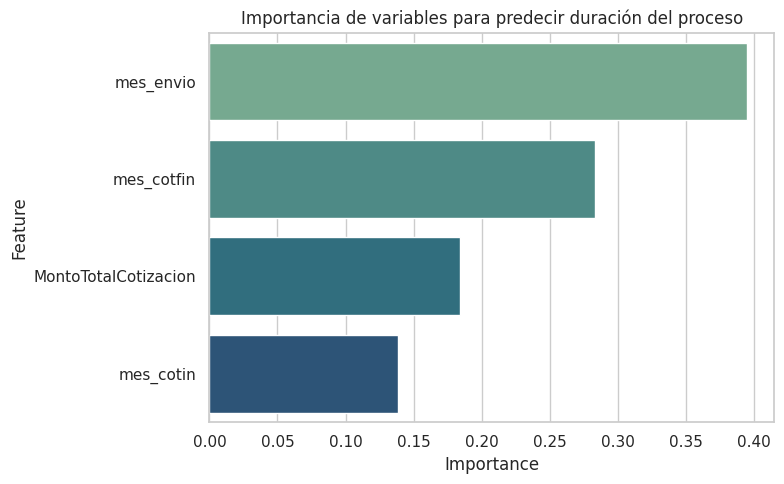

In [38]:
importancia_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_duracion.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=importancia_df, palette='crest')
plt.title("Importancia de variables para predecir duración del proceso")
plt.tight_layout()
plt.show()


para analizar los datos de "estado" segun los periodos del mes para ver si existe alguna correlacción y/o concidencias que no se notaron, se decidio para el estudio volver las categorias de "estado" a binario como "dato correcto" y "observar" como datos con algun dato faltante  

In [48]:
# Agrupar clases: 'dato correcto' vs 'observar'
df1['estado_binario'] = df1['estado_fecha'].apply(
    lambda x: 'dato correcto' if x == 'dato correcto' else 'observar'
)
le_bin = LabelEncoder()
df1['estado_binario'] = le_bin.fit_transform(df1['estado_binario'])  # 0 = 'dato correcto', 1 = 'observar'

print("Clases codificadas:")
print(dict(zip(le_bin.classes_, le_bin.transform(le_bin.classes_))))

Clases codificadas:
{'dato correcto': np.int64(0), 'observar': np.int64(1)}


In [49]:
# Features y target
features = ['MontoTotalCotizacion', 'mes_envio', 'mes_cotin', 'mes_cotfin', 'duracion_cotizacion']
X_raw = df2[features]
y = df2['estado_binario']

# Imputar NaN con la mediana (para no perder ninguna clase)
imputer = SimpleImputer(strategy='median')
X_imputado = pd.DataFrame(imputer.fit_transform(X_raw), columns=features)

# Confirmamos que se mantuvieron las clases
print("Distribución después de imputar (sin eliminar observaciones):")
print(y.value_counts())


Distribución después de imputar (sin eliminar observaciones):
estado_binario
1    213177
0     51231
Name: count, dtype: int64


In [53]:
# Validación cruzada
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
modelo_binario = RandomForestClassifier(random_state=42, class_weight='balanced')

y_pred_cv = cross_val_predict(modelo_binario, X_imputado, y, cv=skf)

# Evaluación
print("\n📋 Reporte de Clasificación (con imputación):")
print(classification_report(
    y, y_pred_cv,
    labels=[0, 1],
    target_names=le_bin.classes_,
    zero_division=0
))



📋 Reporte de Clasificación (con imputación):
               precision    recall  f1-score   support

dato correcto       1.00      1.00      1.00     51231
     observar       1.00      1.00      1.00    213177

     accuracy                           1.00    264408
    macro avg       1.00      1.00      1.00    264408
 weighted avg       1.00      1.00      1.00    264408



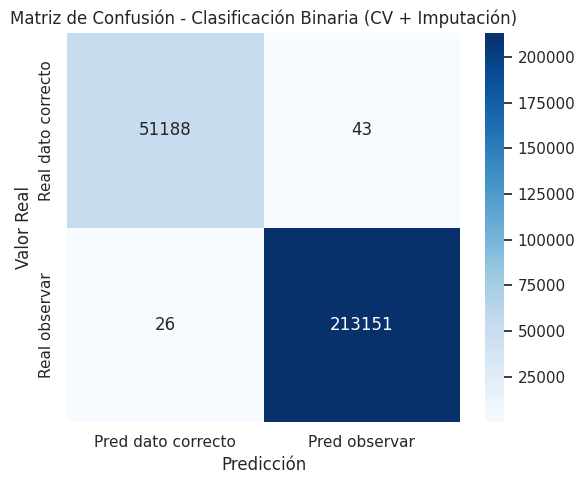

In [54]:
# Crear matriz de confusión
cm = confusion_matrix(y, y_pred_cv, labels=[0, 1])
cm_df = pd.DataFrame(
    cm,
    index=[f"Real {c}" for c in le_bin.classes_],
    columns=[f"Pred {c}" for c in le_bin.classes_]
)

# Graficar
plt.figure(figsize=(6, 5))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - Clasificación Binaria (CV + Imputación)")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.tight_layout()
plt.show()


In [55]:
# Crear una copia de df2 para guardar las predicciones
df2_predicciones = df2.copy()

# Asegurarte de que y_pred_cv y df2_predicciones tienen la misma longitud
print("y_pred_cv:", len(y_pred_cv))
print("df2_predicciones:", len(df2_predicciones))

# Agregar predicciones
df2_predicciones['pred_estado_binario'] = y_pred_cv

# Comparar con los valores reales
df2_predicciones['match_modelo'] = df2_predicciones['estado_binario'] == df2_predicciones['pred_estado_binario']

# Mostrar resumen
print(df2_predicciones['match_modelo'].value_counts())


y_pred_cv: 264408
df2_predicciones: 264408
match_modelo
True     264339
False        69
Name: count, dtype: int64


In [56]:
X_raw = df2[features]  # X_raw tiene todas las filas
X_imputado = imputer.fit_transform(X_raw)


<ipython-input-57-b523b92be4ab>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=errores_por_categoria.values, y=errores_por_categoria.index, palette='Reds_r')


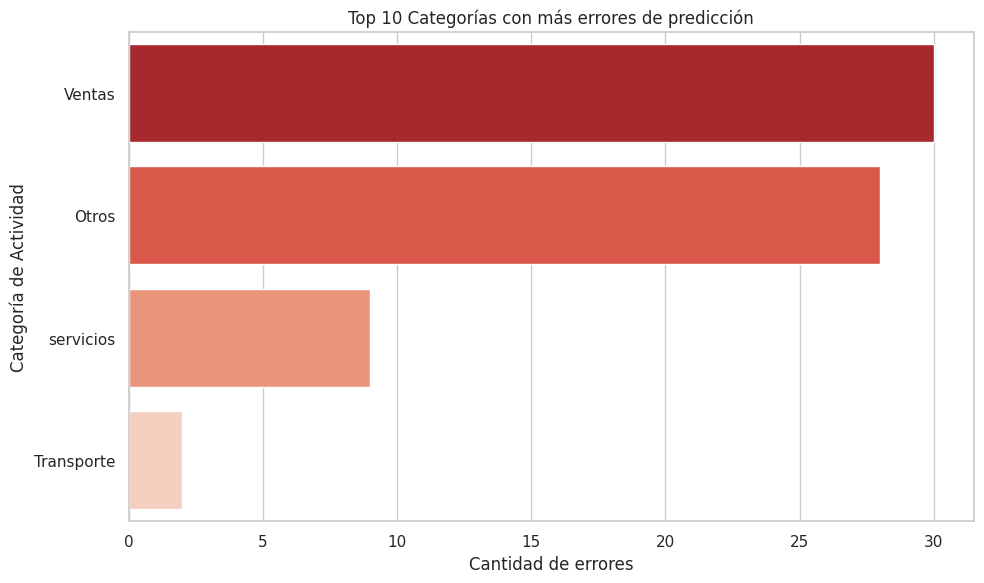

In [57]:
# Filtrar solo errores del modelo
errores_cat = df2_predicciones[df2_predicciones['match_modelo'] == False]

# Contar errores por categoría
errores_por_categoria = errores_cat['CategoriaActividad'].value_counts().head(10)

# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(x=errores_por_categoria.values, y=errores_por_categoria.index, palette='Reds_r')
plt.title("Top 10 Categorías con más errores de predicción")
plt.xlabel("Cantidad de errores")
plt.ylabel("Categoría de Actividad")
plt.tight_layout()
plt.show()


<ipython-input-58-773b8bdafbc4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=errores_por_mes.index, y=errores_por_mes.values, palette='Blues')


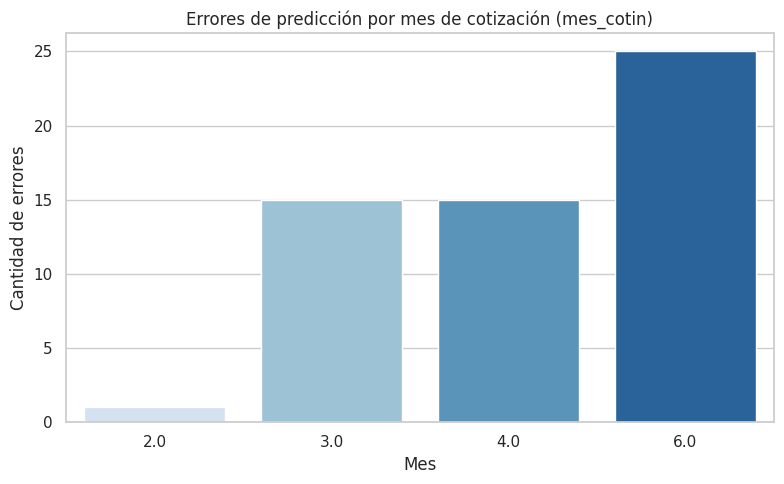

In [58]:
# Contar errores por mes de cotización
errores_por_mes = errores_cat['mes_cotin'].value_counts().sort_index()

# Graficar
plt.figure(figsize=(8, 5))
sns.barplot(x=errores_por_mes.index, y=errores_por_mes.values, palette='Blues')
plt.title("Errores de predicción por mes de cotización (mes_cotin)")
plt.xlabel("Mes")
plt.ylabel("Cantidad de errores")
plt.tight_layout()
plt.show()


#Conclusiones finales

A partir de la exploración de datos y análisis de estos se determinó que hay una existencia de un gran volumen de registros con fechas incompletas (especialmente en los campos de inicio o envío de cotización), lo cual limita la trazabilidad de ciertos procesos y puede estar afectando la eficiencia y transparencia del sistema. También, se detectaron patrones importantes, como el hecho de que algunos de estos registros incompletos aparecen en los "Estados"
 como “Aceptados” o con “Recepción Conforme”, lo cual sugiere inconsistencias en la carga o gestión de la información.

Como exploración de los métodos de clasificación propuestos en la clase se utilizaron para modelar dos objetivos distintos:

Duración del proceso de cotización (clasificación multiclase):

Se entrenó un modelo RandomForest para clasificar las órdenes según su duración (rápido, medio, lento), utilizando variables como mes de cotización y monto total.

El modelo mostró una capacidad razonable para distinguir entre clases, siendo los montos y los meses del proceso las variables más influyentes.

Por otro lado, el Estado de calidad de datos (estado_binario: correcto vs. observar):

Se utilizó validación cruzada y un modelo balanceado para predecir si un registro presenta datos completos o no.

Se observaron errores más frecuentes en ciertas categorías de proveedores y durante algunos meses, lo cual puede indicar áreas críticas para la mejora de la gestión documental.

Con estos resultados en vistas preliminares se puede determinar que existen cuellos de botella por las ineficiencias de la logística del proceso de compras públicas. Con este resultado se puede pensar a futuro el rediseño de los procedimientos del control de calidad de datos y optimizar los tiempos de respuesta, especialmente en rubros con alta recurrencia o impacto financiero.
